In [114]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import splitfolders
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import pathlib

## Data Collecting

 Bagi data :
 - Train
 - Val
 - Test

In [2]:
splitfolders.ratio('HijabDataset/','Data',ratio=(0.7,0.2,0.1))

Copying files: 10000 files [01:01, 162.77 files/s]


In [22]:
trainPath = 'Data/train/'
valPath = 'Data/val/'
testPath = 'Data/test/'

**Read Data**

In [23]:
train =tf.keras.utils.image_dataset_from_directory(trainPath)
val =tf.keras.utils.image_dataset_from_directory(valPath)
test =tf.keras.utils.image_dataset_from_directory(testPath)

Found 7000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


## Data Preprocessing

In [24]:
def random_brightness(image,label):
    return tf.image.random_brightness(image, max_delta=0.5),label

def random_flip(image,label):
    return tf.image.random_flip_left_right(image),label

def resize(image,label):
    return tf.image.resize(image,[150,150]),label

In [25]:
train = train.map(random_brightness).map(random_flip).shuffle(20).map(resize)

test = test.map(resize)

val = val.map(resize)

## Visualisasi Data

In [26]:
class_names = os.listdir('HijabDataset/')
class_names

['hijab', 'nonhijab']

In [121]:
class_size = []

for i in os.listdir(trainPath):
    image_count = 0
    data_dir = pathlib.Path(trainPath + '/' +i)
    image_count = len(os.listdir(data_dir))
    class_size.append(image_count)

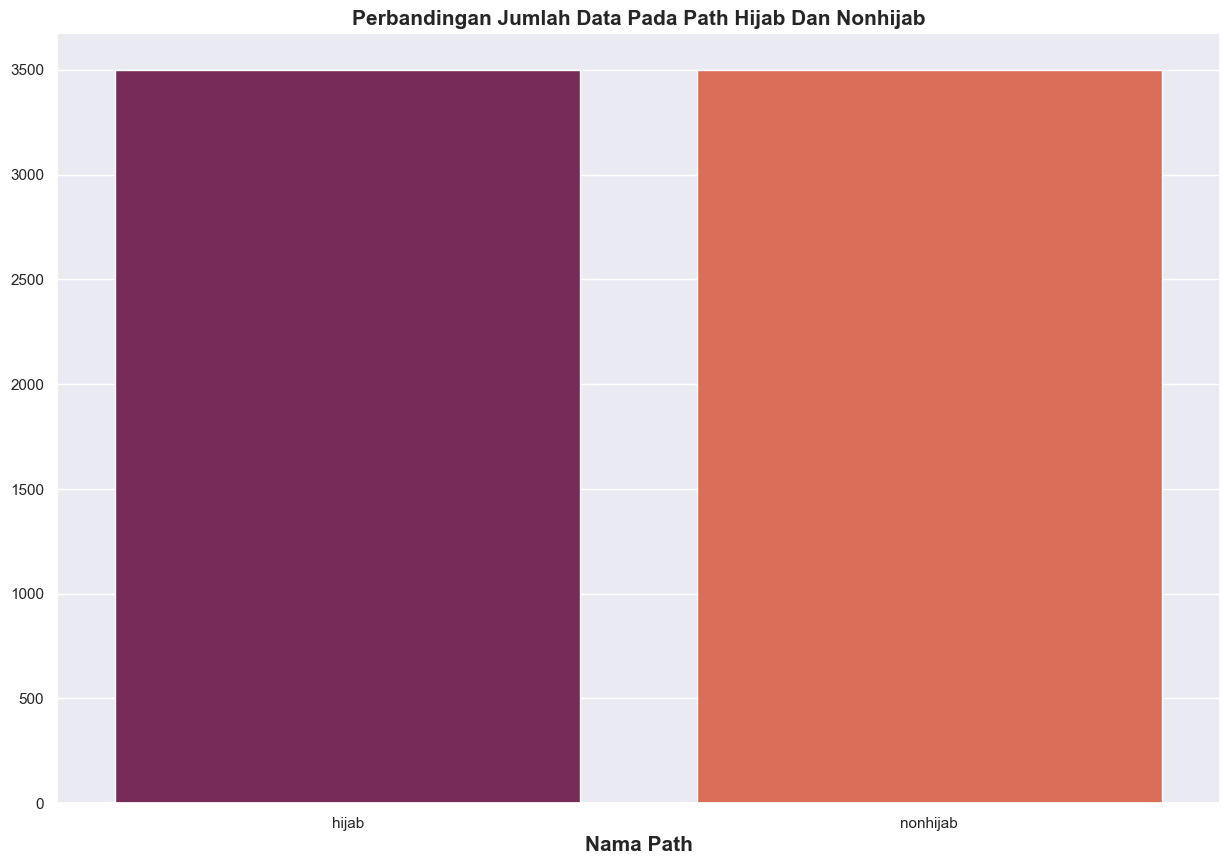

In [122]:
sns.set_theme()
plt.figure(figsize=(15,10))

sns.barplot(x=class_names,y=class_size,palette='rocket')
plt.title("Perbandingan Jumlah Data Pada Path Hijab Dan Nonhijab",fontfamily='arial',fontsize=15, fontweight='bold')
plt.xlabel('Nama Path',fontfamily='arial',fontsize=15, fontweight='bold')
plt.show()

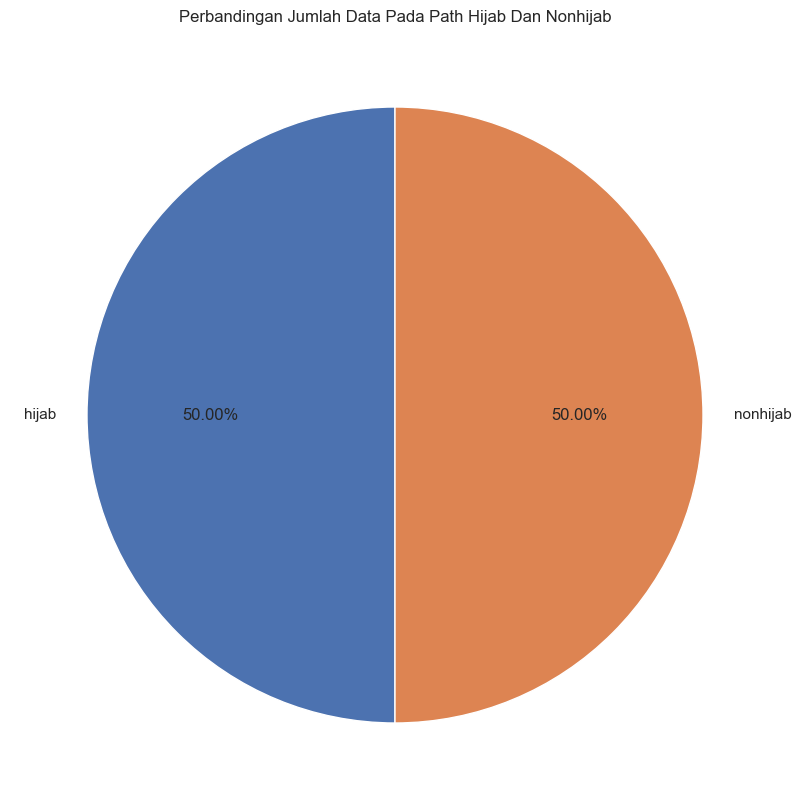

In [113]:
plt.figure(figsize=(10,10))
plt.pie(class_size, labels=class_names,startangle=90,autopct='%.2f%%')
plt.title('Perbandingan Jumlah Data Pada Path Hijab Dan Nonhijab')
plt.show()

**Preview Data**

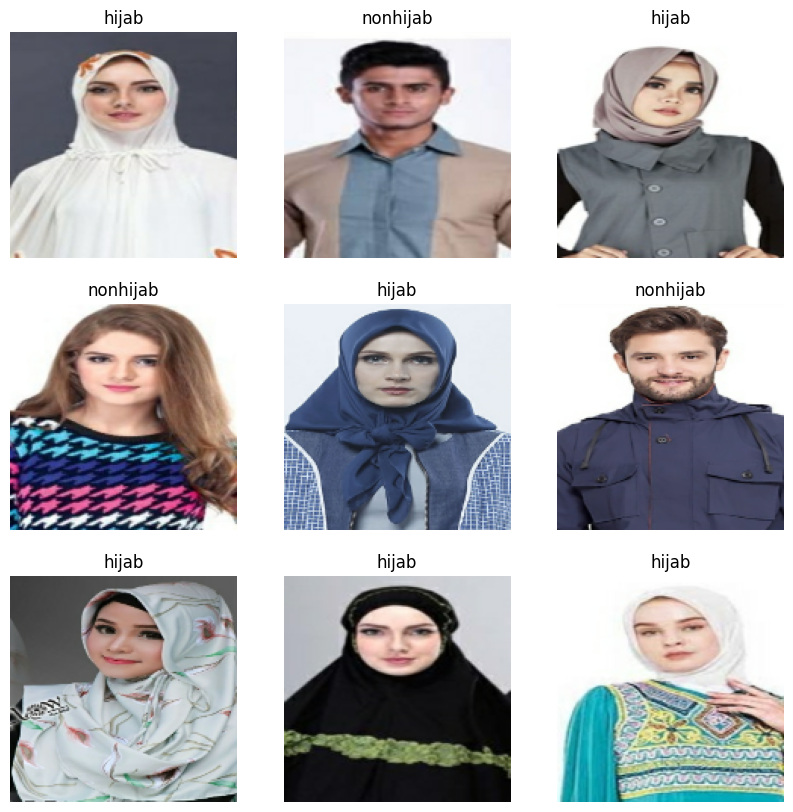

In [27]:
# data visualization
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis('off')
